In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text
from drawarrow import ax_arrow

## Load Dataset

Load and aggregate data into **daily** road accidents.


In [3]:
url = "https://raw.githubusercontent.com/anw-g01/dataviz-anw/refs/heads/main/road_safety_open_data_2016/data/road_accidents.csv"

df = pd.read_csv(url, parse_dates=["date_time"], date_format="%Y-%m-%d %H:%M:%S")

df["date"] = df["date_time"].dt.date        # remove timestamp from datetime column

df = (
    df.drop_duplicates(subset=["index"])    # filter for each row as a unique accident
    .groupby("date")                        # group by calendar ays
    .size()                                 # count no. of accidents that occured per calendar day
    .reset_index(name="num_accidents")
)

df

,date,num_accidents
0,2016-01-01,282
1,2016-01-02,251
2,2016-01-03,221
3,2016-01-04,349
4,2016-01-05,352
...,...,...
361,2016-12-27,261
362,2016-12-28,286
363,2016-12-29,295
364,2016-12-30,249


Quick EDA: Identify days with **highest** and **lowest** number of accidents.

In [4]:
n = 5    # top n days with highest accidents

highest = (
    df.assign(
        date=pd.to_datetime(df['date']).dt.strftime("%a, %d %b %y")
    )
    .nlargest(n=5, columns=["num_accidents"])
    .rename(
        columns={
            "date": "Date",
            "num_accidents": "Number of Accidents"
        }
    )
    .to_markdown(
        index=False,
        tablefmt="grid"
    )
)

lowest = (
    df.assign(
        date=pd.to_datetime(df['date']).dt.strftime("%a, %d %b %y")
    )
    .nsmallest(n=5, columns=["num_accidents"])
    .rename(
        columns={
            "date": "Date",
            "num_accidents": "Number of Accidents"
        }
    )
    .to_markdown(
        index=False,
        tablefmt="grid"
    )
)

print(f"Top {n} days with highest no. of accidents:\n{highest}")
print(f"\nTop {n} days with lowest no. of accidents:\n{lowest}")

Top 5 days with highest no. of accidents:
+----------------+-----------------------+
| Date           |   Number of Accidents |
+================+=======================+
| Fri, 25 Nov 16 |                   566 |
+----------------+-----------------------+
| Thu, 01 Dec 16 |                   537 |
+----------------+-----------------------+
| Fri, 11 Nov 16 |                   532 |
+----------------+-----------------------+
| Fri, 18 Nov 16 |                   527 |
+----------------+-----------------------+
| Tue, 29 Nov 16 |                   521 |
+----------------+-----------------------+

Top 5 days with lowest no. of accidents:
+----------------+-----------------------+
| Date           |   Number of Accidents |
+================+=======================+
| Sun, 25 Dec 16 |                   138 |
+----------------+-----------------------+
| Mon, 26 Dec 16 |                   187 |
+----------------+-----------------------+
| Sat, 31 Dec 16 |                   201 |
+------------

## Scatter Plot - Daily Accidents in 2016

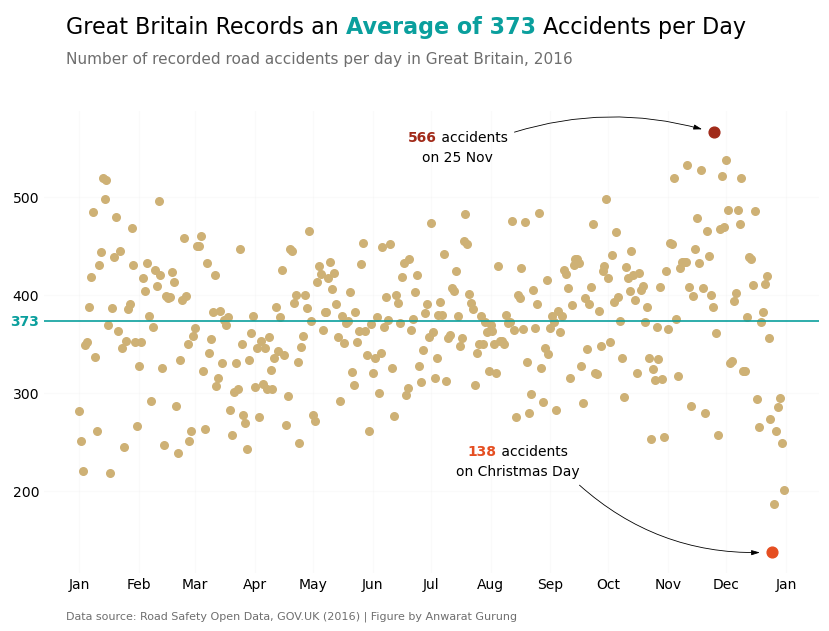

In [37]:
# create a figure for visualisation
fig, ax = plt.subplots(figsize=(10, 6))

# axes customisation
ax.grid(True, alpha=0.05)                                           # add a light background grid   
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)    # remove all plot borders
ax.tick_params(length=0)                                            # remove tick marks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))            # display month names on x-axis (Jan, Feb, etc.)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))         # place ticks at monthly intervals

# choose a colour palette
cmap = load_cmap("AsteroidCity1")
colours = cmap.colors

# plot a scatter graph
marker_size = 30
ax.scatter(
    df["date"],
    df["num_accidents"],
    c=colours[1],
    s=marker_size,
)

# highlight the highest/lowest days
max_day = df.iloc[df["num_accidents"].idxmax()]
min_day = df.iloc[df["num_accidents"].idxmin()]
ax.scatter(
    max_day["date"],
    max_day["num_accidents"],
    s=marker_size * 2,
    c="#A12A19FF"     # red
)
ax.scatter(
    min_day["date"],
    min_day["num_accidents"],
    s=marker_size * 2,
    c=colours[2],
)

# annotate the highest/lowest days (uses the highlight_text package for text colouring)
n_min, n_max = min_day["num_accidents"], max_day["num_accidents"]
ax_text(
    x=mdates.date2num(pd.Timestamp("2016-08-15")),
    y=230,
    s=f"<{n_min}> accidents\non Christmas Day",    
    highlight_textprops=[
        {"color": colours[2], "weight": "bold"},
    ],
    fontsize=10,
    va="center",
    ha="center",
    textalign="center"
)
max_day_date = max_day["date"].strftime("%d %b")    # date where max accidents occured
ax_text(
    x=mdates.date2num(pd.Timestamp("2016-07-15")),
    y=550,
    s=f"<{n_max}> accidents\non {max_day_date}",
    highlight_textprops=[
        {"color": "#A12A19FF", "weight": "bold"},
    ],
    fontsize=10,
    va="center",
    ha="center",
    textalign="center"
)

# draw arrows to highlight highest/lowest data points
ax_arrow(
    tail_position=[mdates.date2num(pd.Timestamp("2016-08-12")), 565],
    head_position=[mdates.date2num(pd.Timestamp("2016-11-20")), 568],
    fill_head=True,
    head_width=1.5,
    head_length=5,
    color="black",
    radius=-0.15,
    width=0.6
)
ax_arrow(
    tail_position=[mdates.date2num(pd.Timestamp("2016-09-15")), 208],
    head_position=[mdates.date2num(pd.Timestamp("2016-12-20")), 137.5],
    fill_head=True,
    head_width=1.5,
    head_length=5,
    color="black",
    radius=0.2,
    width=0.6
)

# plot a marker horizontal line to show the average no. of accidents
y_avg = df["num_accidents"].mean()
ax.axhline(
    y=y_avg,
    linewidth=1.2,
    color=colours[0]
)
ax.text(
    x=mdates.date2num(pd.Timestamp("2015-12-11")),
    y=y_avg,
    s=f"{int(y_avg.round())}",
    color=colours[0],
    va="center",
    ha="right",
    weight="bold"
)

# chart title
x_value, y_value = 0.147, 1.04    # starting location of title text in figure coordinates
fig_text(
    x=x_value, y=y_value,
    s=f"Great Britain Records an <Average of {int(y_avg.round())}> Accidents per Day",
    highlight_textprops=[
        {"color": colours[0], "weight": "bold"},
    ],
    fontsize=16
)

# chart subtitle
fig.text(
    x=x_value,
    y=y_value * 0.922,
    s="Number of recorded road accidents per day in Great Britain, 2016",
    size=11,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value,
    0.03,
    "Data source: Road Safety Open Data, GOV.UK (2016) | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=8,
    color="#6e6e6e",
)

# plt.savefig("../images/daily_road_accidents.png", dpi=200, bbox_inches="tight")

plt.show()